In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweets-and-user-engagement/Twitterdatainsheets.csv


## Import Dataset

In [2]:
df = pd.read_csv('/kaggle/input/tweets-and-user-engagement/Twitterdatainsheets.csv')

/tmp/ipykernel_19/317565534.py:1: DtypeWarning: Columns (3,4,5,6,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/tweets-and-user-engagement/Twitterdatainsheets.csv')


In [3]:
df.info

<bound method DataFrame.info of          index                TweetID   Weekday  Hour  Day  Lang  IsReshare  \
0            0  tw-682712873332805633  Thursday    17   31    en      False   
1            1  tw-682713045357998080  Thursday    17   31    en       True   
2            2  tw-682713219375476736  Thursday    17   31    en      False   
3            3  tw-682713436967579648  Thursday    17   31    en      False   
4            4  tw-682714048199311366  Thursday    17   31    en      False   
...        ...                    ...       ...   ...  ...   ...        ...   
206290  206290           tw-443876086    Female   NaN  NaN   NaN        NaN   
206291  206291           tw-565013710   Unknown   NaN  NaN   NaN        NaN   
206292  206292           tw-322341885    Female   NaN  NaN   NaN        NaN   
206293  206293          tw-3304550634      Male   NaN  NaN   NaN        NaN   
206294  206294                    NaN       NaN   NaN  NaN   NaN        NaN   

         Reach   Re

In [4]:
df.columns

Index(['index', 'TweetID', ' Weekday', ' Hour', ' Day', ' Lang', ' IsReshare',
       ' Reach', ' RetweetCount', ' Likes', ' Klout', ' Sentiment', ' text',
       ' LocationID', ' UserID'],
      dtype='object')

In [5]:
# Clean up column names
df.columns = df.columns.str.strip()

# Check the cleaned column names
df.columns


Index(['index', 'TweetID', 'Weekday', 'Hour', 'Day', 'Lang', 'IsReshare',
       'Reach', 'RetweetCount', 'Likes', 'Klout', 'Sentiment', 'text',
       'LocationID', 'UserID'],
      dtype='object')

## Data Preprocessing

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Display data types
data_types = df.dtypes

# Display the results
print("Missing Values:")
print(missing_values)

print("\nData Types:")
print(data_types)


Missing Values:
index                0
TweetID              4
Weekday              3
Hour            100120
Day             100114
Lang            100162
IsReshare       106295
Reach           106295
RetweetCount    106295
Likes           106295
Klout           106295
Sentiment       106295
text            106295
LocationID      106295
UserID          106295
dtype: int64

Data Types:
index             int64
TweetID          object
Weekday          object
Hour             object
Day              object
Lang             object
IsReshare        object
Reach           float64
RetweetCount    float64
Likes           float64
Klout           float64
Sentiment       float64
text             object
LocationID      float64
UserID           object
dtype: object


This code cell is performing an initial check on the dataset (df) to identify and analyze missing values. It also provides information about the data types of each column

In [7]:
# Drop rows with missing values for specific columns
df_cleaned = df.dropna(subset=['TweetID', 'Weekday', 'Hour', 'Day', 'Lang'])

# Display the shape of the cleaned DataFrame
print("Shape after handling missing values:", df_cleaned.shape)


Shape after handling missing values: (106128, 15)


This code cell is aimed at cleaning the dataset (df) by removing rows that have missing values in specific columns.

**Drop Rows with Missing Values:**

The dropna() method is used to remove rows with missing values from the specified columns ('TweetID', 'Weekday', 'Hour', 'Day', and 'Lang').
The cleaned DataFrame is stored in the variable df_cleaned.
Display the Shape of the Cleaned DataFrame:

The shape attribute is used to obtain the dimensions (number of rows and columns) of the cleaned DataFrame.
The results are printed to the console.

In [8]:
# Define numeric_columns based on the numeric columns in your DataFrame
numeric_columns = ['Hour', 'Day', 'IsReshare', 'Reach', 'RetweetCount', 'Likes', 'Klout', 'Sentiment', 'LocationID']

# Convert numeric columns to appropriate data types using .loc
df_cleaned.loc[:, numeric_columns] = df_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Display the data types after conversion
print("\nData Types after conversion:")
print(df_cleaned.dtypes)

# Check for missing values again
missing_values_cleaned = df_cleaned.isnull().sum()
print("\nMissing Values after cleaning:")
print(missing_values_cleaned)





Data Types after conversion:
index             int64
TweetID          object
Weekday          object
Hour             object
Day              object
Lang             object
IsReshare        object
Reach           float64
RetweetCount    float64
Likes           float64
Klout           float64
Sentiment       float64
text             object
LocationID      float64
UserID           object
dtype: object

Missing Values after cleaning:
index              0
TweetID            0
Weekday            0
Hour            6128
Day             6128
Lang               0
IsReshare       6128
Reach           6128
RetweetCount    6128
Likes           6128
Klout           6128
Sentiment       6128
text            6128
LocationID      6128
UserID          6128
dtype: int64


This code cell is responsible for converting the numeric columns in the cleaned DataFrame (df_cleaned) to appropriate data types using the .loc accessor.

In [9]:
# Impute missing values for numeric columns using .loc
df_cleaned.loc[:, numeric_columns] = df_cleaned.loc[:, numeric_columns].apply(lambda x: x.fillna(x.mean()))

# Display the DataFrame after imputation
print(df_cleaned.head())



   index                TweetID   Weekday  Hour   Day Lang IsReshare   Reach  \
0      0  tw-682712873332805633  Thursday  17.0  31.0   en       0.0    44.0   
1      1  tw-682713045357998080  Thursday  17.0  31.0   en       1.0  1810.0   
2      2  tw-682713219375476736  Thursday  17.0  31.0   en       0.0   282.0   
3      3  tw-682713436967579648  Thursday  17.0  31.0   en       0.0  2087.0   
4      4  tw-682714048199311366  Thursday  17.0  31.0   en       0.0   953.0   

   RetweetCount  Likes  Klout  Sentiment  \
0           0.0    0.0   35.0        0.0   
1           5.0    0.0   53.0        2.0   
2           0.0    0.0   47.0        0.0   
3           4.0    0.0   53.0        0.0   
4           0.0    0.0   47.0        0.0   

                                                text  LocationID  \
0  We are hiring: Senior Software Engineer - Prot...      3751.0   
1  RT @CodeMineStatus: This is true Amazon Web Se...      3989.0   
2  Devops Engineer Aws Ansible Cassandra Mysql Ub.

This code cell is focused on imputing missing values in the numeric columns of the cleaned DataFrame (df_cleaned) using the mean value of each column.

## Data Visualization

Basic Statistics for Numeric Columns:
              Reach   RetweetCount          Likes          Klout  \
count  1.061280e+05  106128.000000  106128.000000  106128.000000   
mean   8.542396e+03       8.052750       0.152770      40.389260   
std    8.607220e+04      94.996043       2.507931      13.236958   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    1.670000e+02       0.000000       0.000000      33.000000   
50%    5.060000e+02       1.000000       0.000000      42.000000   
75%    2.056000e+03       4.000000       0.000000      48.000000   
max    1.034245e+07   26127.000000     133.000000      99.000000   

           Sentiment     LocationID  
count  106128.000000  106128.000000  
mean        0.380921    2836.163440  
std         1.015895    1284.371804  
min        -6.000000       1.000000  
25%         0.000000    1664.000000  
50%         0.000000    3083.000000  
75%         0.380921    3768.000000  
max         7.333333    6289.000000  


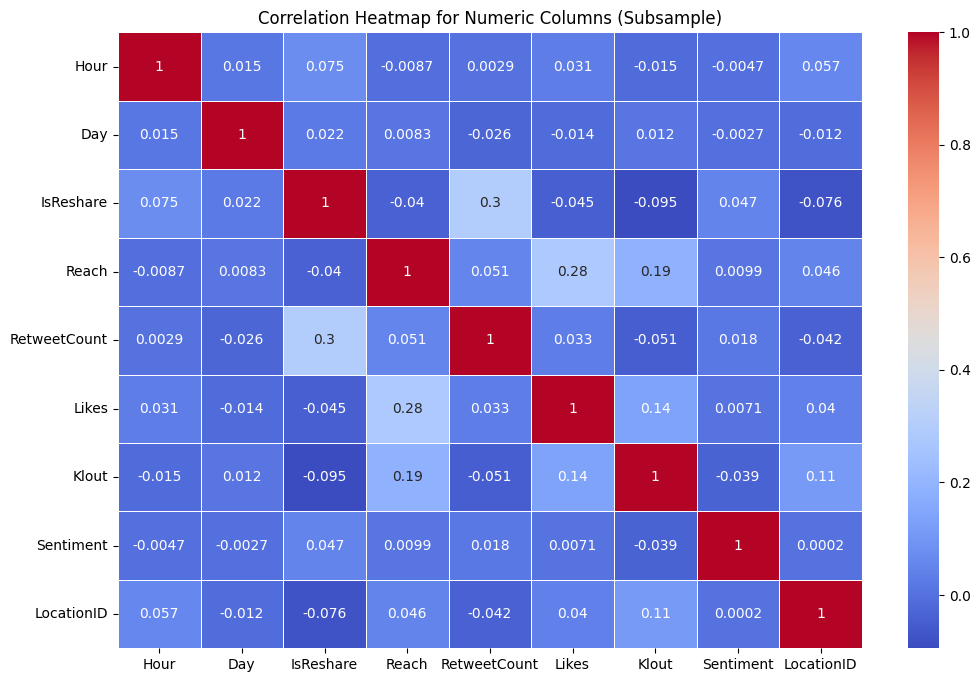

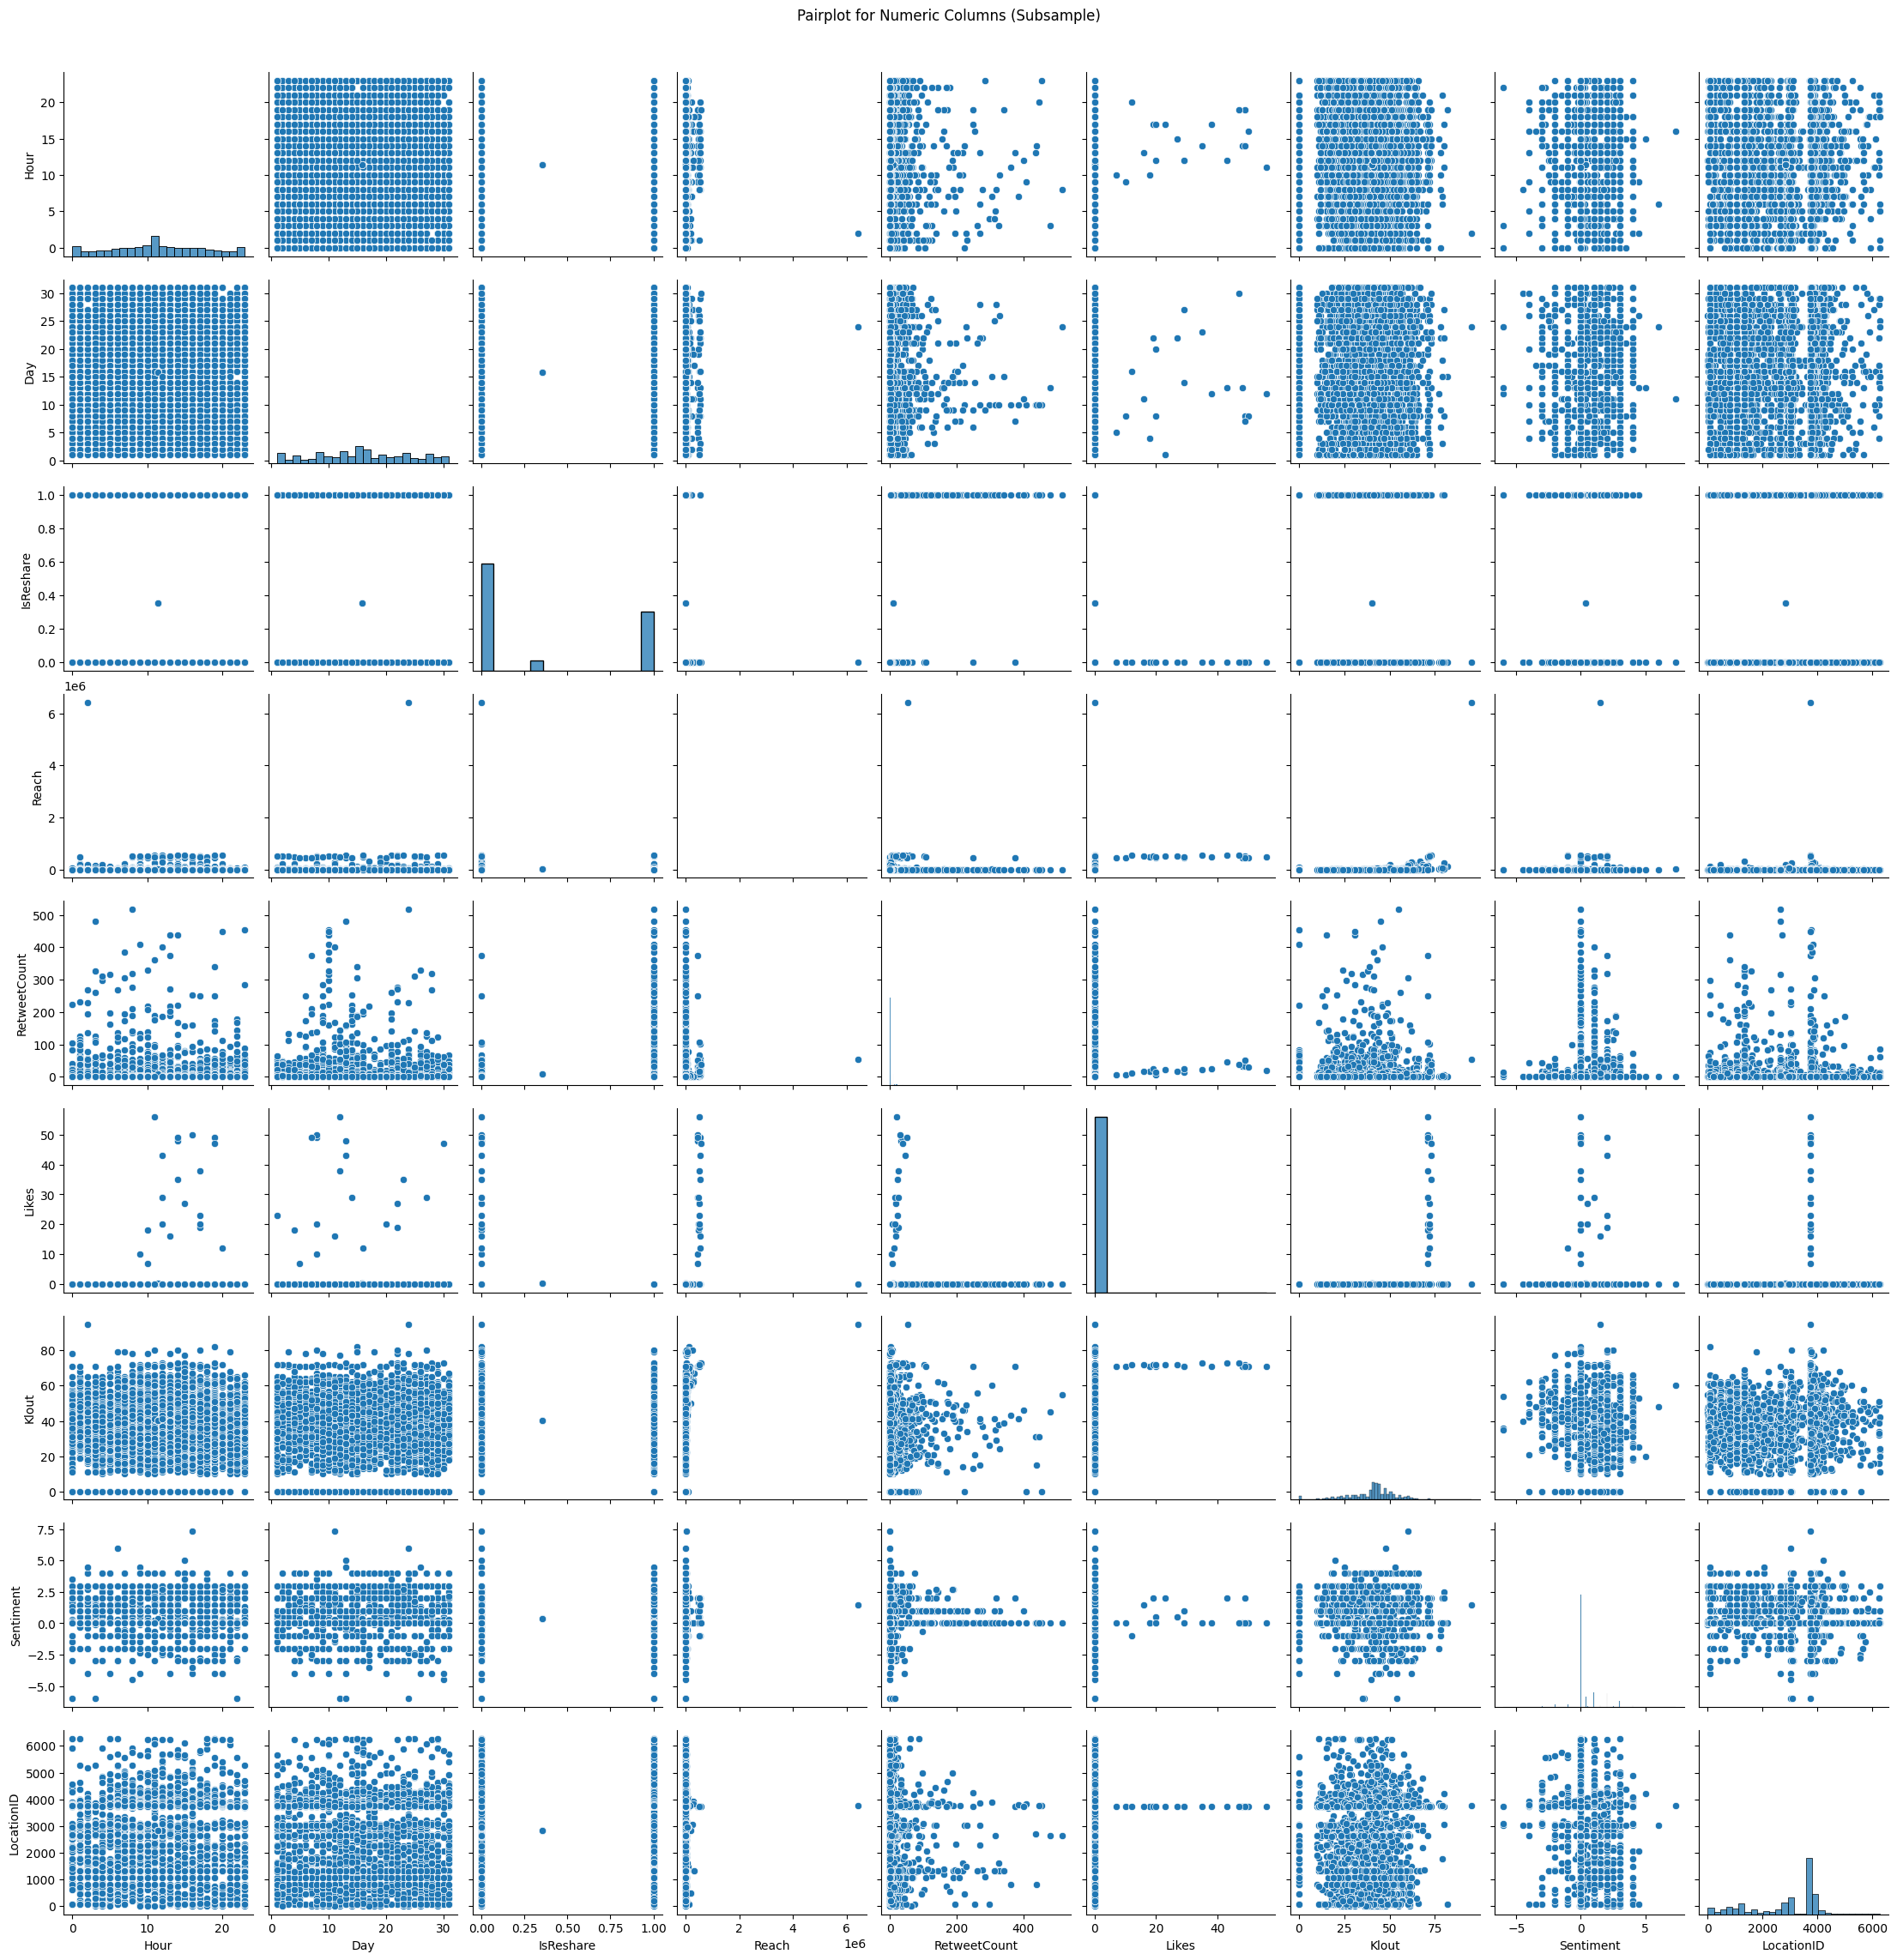

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics for numeric columns
numeric_stats = df_cleaned[numeric_columns].describe()
print("Basic Statistics for Numeric Columns:")
print(numeric_stats)

# Subsample the data (adjust n as needed)
df_subsample = df_cleaned.sample(n=5000)

# Correlation heatmap for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_subsample[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numeric Columns (Subsample)')
plt.show()

# Pairplot for numeric columns
sns.pairplot(df_subsample[numeric_columns])
plt.suptitle('Pairplot for Numeric Columns (Subsample)', y=1.02)
plt.show()




This code cell is responsible for generating visualizations and basic statistics for numeric columns in the cleaned DataFrame (df_cleaned). 

**Basic Statistics:**

The describe() method is used to compute basic statistics for numeric columns, such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.
The result is printed to the console.

*Subsampling Data:*

A subsample of the cleaned DataFrame (df_cleaned) is created using the sample() method. Adjust the value of n in the sample(n=5000) line to change the size of the subsample.

*Correlation Heatmap:*

A heatmap is generated using seaborn's heatmap() function to visualize the correlation between numeric columns in the subsample. The cmap parameter specifies the color map, and annot=True adds the correlation values to the heatmap.

*Pairplot:*

A pairplot is created using seaborn's pairplot() function, showing scatter plots for pairs of numeric columns. This provides a quick overview of the relationships between different variables in the subsample.




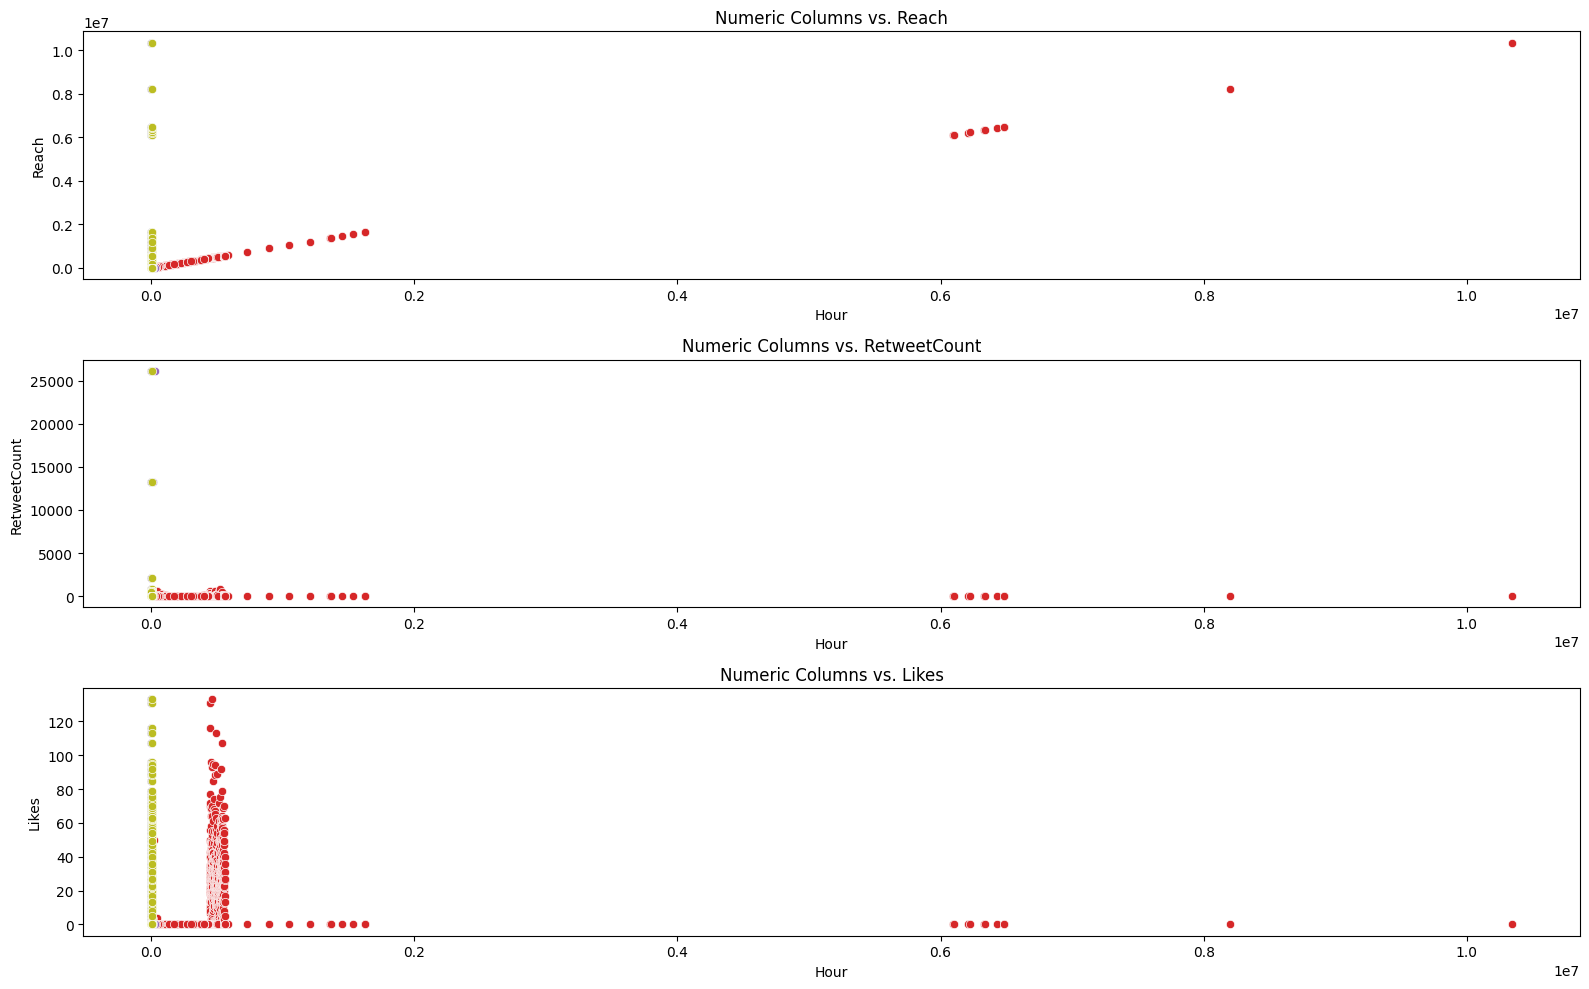

In [11]:
# Scatter plots for numeric columns vs. engagement metrics
engagement_columns = ['Reach', 'RetweetCount', 'Likes']

plt.figure(figsize=(16, 10))
for i, engagement_metric in enumerate(engagement_columns):
    plt.subplot(3, 1, i + 1)
    for column in numeric_columns:
        sns.scatterplot(x=column, y=engagement_metric, data=df_cleaned)
    plt.title(f'Numeric Columns vs. {engagement_metric}')

plt.tight_layout()
plt.show()


This code cell focuses on creating scatter plots to visualize the relationships between numeric columns and engagement metrics (Reach, RetweetCount, Likes). Let's break down the components:

Setup:

engagement_columns is a list containing the names of engagement metrics to be analyzed ('Reach', 'RetweetCount', 'Likes').
Plotting:

A subplot grid is created using plt.subplot(3, 1, i + 1) to arrange three plots vertically, one for each engagement metric.
A loop iterates over each engagement metric, and for each metric, another loop iterates over numeric columns.
sns.scatterplot() is used to create scatter plots for each pair of a numeric column and an engagement metric.
Titles and Layout:

plt.title() is used to set titles for each subplot, indicating the engagement metric being plotted.
plt.tight_layout() ensures that subplot titles and axis labels do not overlap.
Display Plots:

plt.show() is used to display the generated scatter plots.

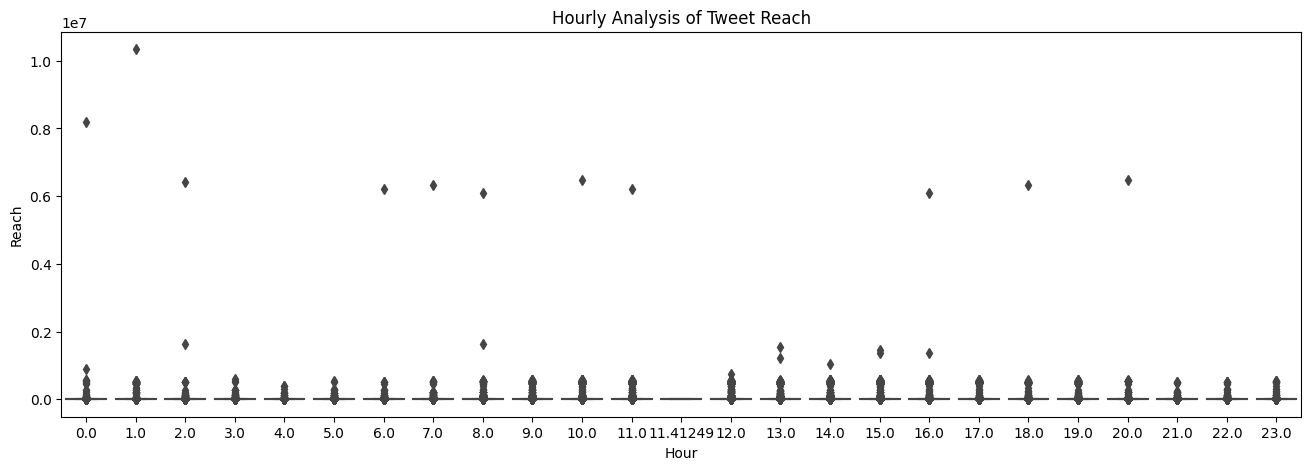

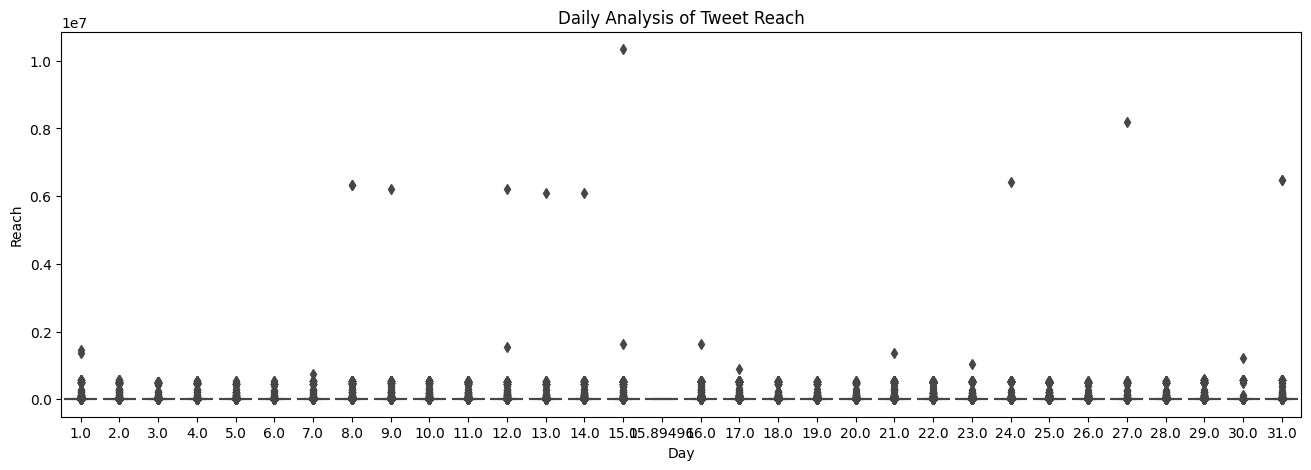

In [12]:
# Hourly Analysis
plt.figure(figsize=(16, 5))
sns.boxplot(x='Hour', y='Reach', data=df_cleaned)
plt.title('Hourly Analysis of Tweet Reach')
plt.show()

# Daily Analysis
plt.figure(figsize=(16, 5))
sns.boxplot(x='Day', y='Reach', data=df_cleaned)
plt.title('Daily Analysis of Tweet Reach')
plt.show()


This code cell focuses on conducting hourly and daily analyses of tweet reach using boxplots. Let's go through each part of the code:

Hourly Analysis:

A boxplot is created using seaborn's boxplot() function to visualize the distribution of tweet reach ('Reach') across different hours of the day ('Hour').
The x-axis represents the hours, and the y-axis represents the tweet reach.
plt.title() is used to set the title of the plot to "Hourly Analysis of Tweet Reach."
Daily Analysis:

Another boxplot is created, but this time the analysis is conducted on a daily basis ('Day').
The x-axis represents the days, and the y-axis represents the tweet reach.
plt.title() is used to set the title of the plot to "Daily Analysis of Tweet Reach."
Display Plots:

plt.show() is used to display the generated boxplots.

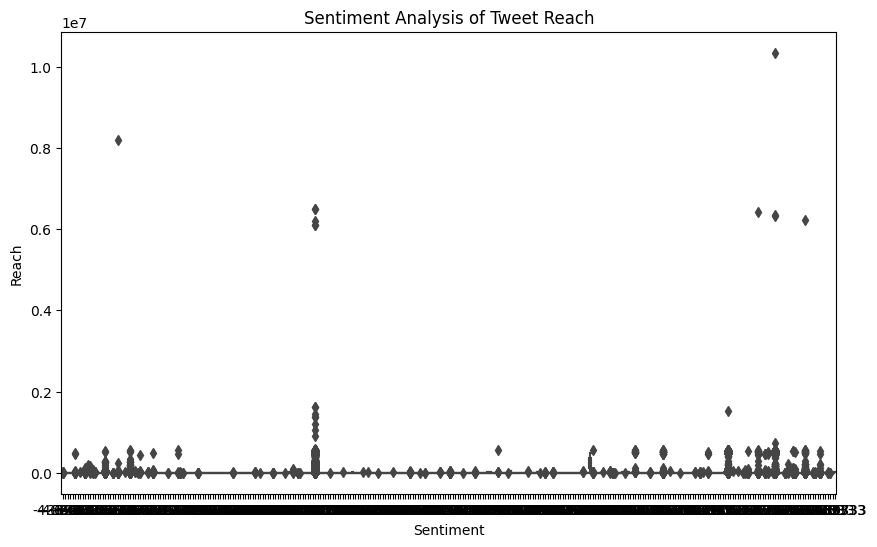

In [13]:
# Sentiment Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Reach', data=df_cleaned)
plt.title('Sentiment Analysis of Tweet Reach')
plt.show()


This code cell focuses on conducting sentiment analysis of tweet reach using a boxplot. Let's go through each part of the code:

Sentiment Analysis:

A boxplot is created using seaborn's boxplot() function to visualize the distribution of tweet reach ('Reach') across different sentiment scores ('Sentiment').
The x-axis represents the sentiment scores, and the y-axis represents the tweet reach.
Sentiment scores are numerical values obtained from sentiment analysis, where higher scores may indicate more positive sentiments.
plt.title() is used to set the title of the plot to "Sentiment Analysis of Tweet Reach."
Display Plot:

plt.show() is used to display the generated boxplot.

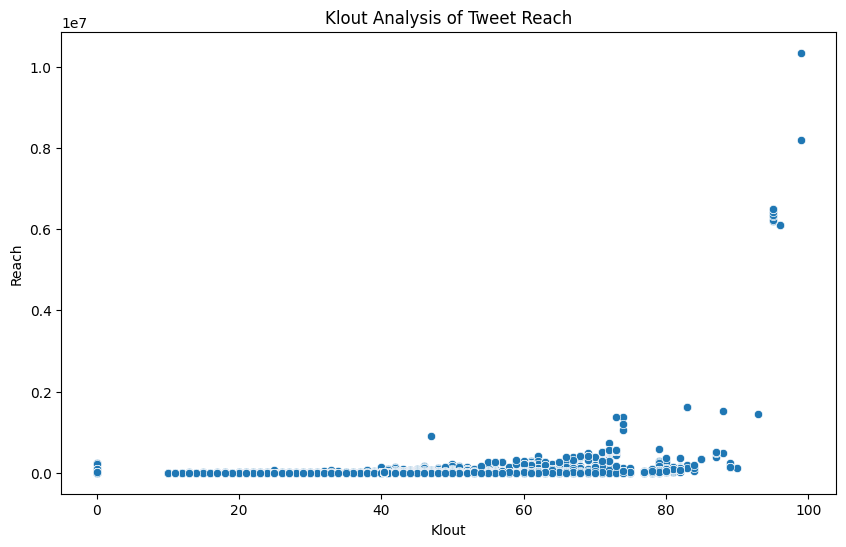

In [14]:
# Klout Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Klout', y='Reach', data=df_cleaned)
plt.title('Klout Analysis of Tweet Reach')
plt.show()


This code cell focuses on conducting an analysis of tweet reach based on Klout scores using a scatter plot. Let's go through each part of the code:

Klout Analysis:

A scatter plot is created using seaborn's scatterplot() function to visualize the relationship between Klout scores ('Klout') and tweet reach ('Reach').
The x-axis represents the Klout scores, and the y-axis represents the tweet reach.
Klout scores are a measure of social media influence, and this analysis helps understand if users with higher Klout scores tend to have a higher tweet reach.
plt.title() is used to set the title of the plot to "Klout Analysis of Tweet Reach."
Display Plot:

plt.show() is used to display the generated scatter plot.

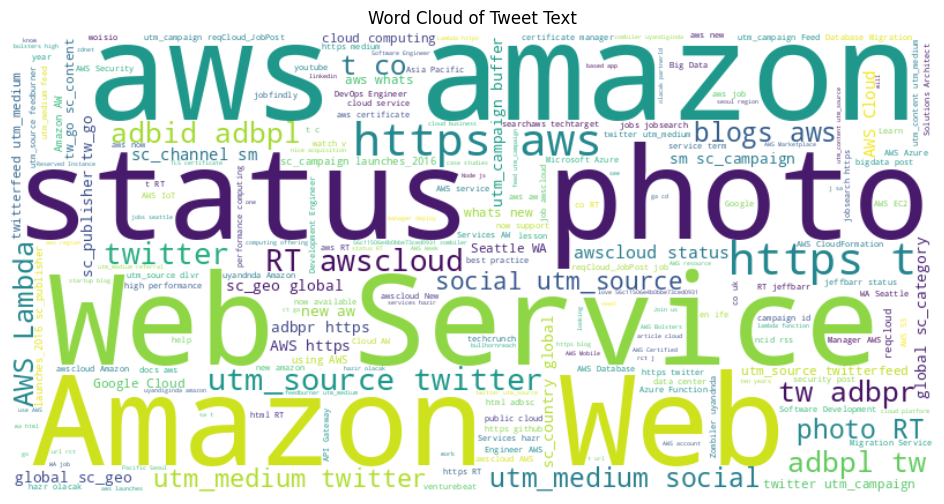

In [15]:
from wordcloud import WordCloud

# Combine text from all tweets
all_text = ' '.join(df_cleaned['text'].dropna())

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Text')
plt.show()


This code cell focuses on generating a word cloud visualization based on the text of the tweets. Let's go through each part of the code:

Combine Text:

The text content from all tweets is combined into a single string using the join() method. This aggregated text will be used to generate the word cloud.
df_cleaned['text'].dropna() is used to extract the tweet text, and dropna() is applied to handle any potential missing values.
Create WordCloud:

The WordCloud class from the wordcloud library is employed to create the word cloud.
Parameters like width, height, and background_color are set to customize the appearance of the word cloud.
Display WordCloud:

plt.imshow() is used to display the generated word cloud.
plt.axis('off') removes the axis labels.
plt.title() sets the title of the plot to "Word Cloud of Tweet Text."

## Sentiment Analysis

In [16]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/tmp/ipykernel_19/3152827083.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SentimentScore'] = df_cleaned['text'].dropna().apply(lambda x: sia.polarity_scores(x)['compound'])


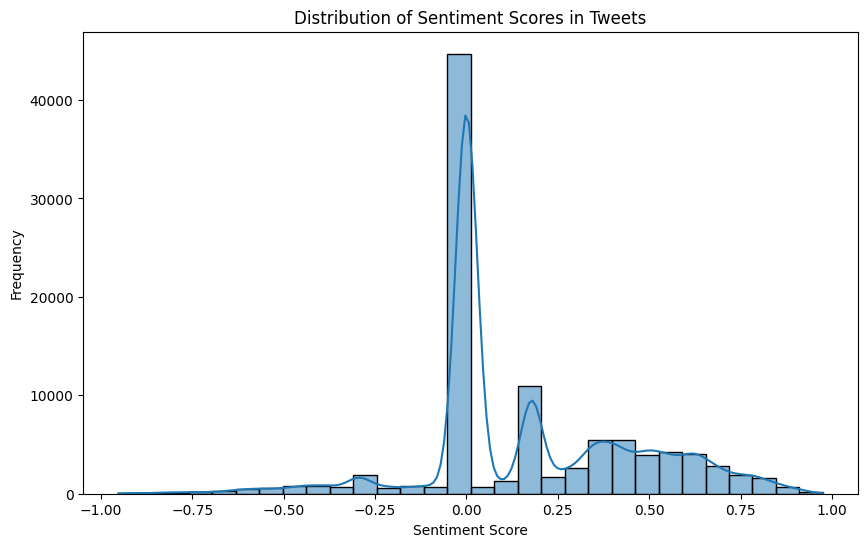

In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each tweet
df_cleaned['SentimentScore'] = df_cleaned['text'].dropna().apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['SentimentScore'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores in Tweets')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


This code cell focuses on sentiment analysis of the tweets using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool. Let's go through each part of the code:

Download VADER Lexicon:

The nltk.download('vader_lexicon') line downloads the VADER lexicon, a pre-built sentiment analysis lexicon used by the NLTK library.
Initialize SentimentIntensityAnalyzer:

The SentimentIntensityAnalyzer from the NLTK's VADER module is initialized. This analyzer provides a compound sentiment score for a given text.
Sentiment Analysis:

The sentiment of each tweet is analyzed using the VADER sentiment analyzer.
The compound sentiment score is obtained for each tweet's text by applying sia.polarity_scores(x)['compound'].
Visualize Sentiment Distribution:

A histogram is created using Seaborn (sns.histplot) to visualize the distribution of sentiment scores in the tweets.
The x-axis represents the sentiment scores, and the y-axis represents the frequency of tweets with a specific sentiment score.
The title, xlabel, and ylabel are set for better interpretation of the plot.

## Test Model

In [18]:
# Choose a specific tweet index
specific_tweet_index = 302  # Change this index to the tweet you want to analyze

# Get the text of the specific tweet
specific_tweet_text = df_cleaned.loc[specific_tweet_index, 'text']

# Calculate the sentiment score for the specific tweet
specific_tweet_sentiment_score = sia.polarity_scores(specific_tweet_text)['compound']

# Print the results
print(f"Text of the specific tweet:\n{specific_tweet_text}\n")
print(f"Sentiment Score for the specific tweet: {specific_tweet_sentiment_score}")


Text of the specific tweet:
Sr Devops Engineer Aws Jobs in Los Angeles CA #LosAngeles #CA #jobs #jobsearch https://www.jobfindly.com/sr-devops-engineer-aws-jobs-los-angeles-ca.html

Sentiment Score for the specific tweet: 0.0


This code cell is designed to analyze the sentiment of a specific tweet in the dataset. Here's a breakdown of each part:

Choose a Specific Tweet:

The variable specific_tweet_index is set to a specific index value. You can change this value to the index of the tweet you want to analyze.
Retrieve Text of the Specific Tweet:

Using df_cleaned.loc[specific_tweet_index, 'text'], the text content of the specified tweet is extracted from the DataFrame.
Calculate Sentiment Score:

The VADER SentimentIntensityAnalyzer (sia) is employed to compute the sentiment score for the specific tweet.
The compound sentiment score is obtained by applying sia.polarity_scores(specific_tweet_text)['compound'].
Print Results:

The text content of the specific tweet is printed for reference.
The calculated sentiment score for the specific tweet is printed as well.

In [19]:
# Choose a specific tweet index
specific_tweet_index = 32  # Change this index to the tweet you want to analyze

# Get the text of the specific tweet
specific_tweet_text = df_cleaned.loc[specific_tweet_index, 'text']

# Calculate the sentiment score for the specific tweet
specific_tweet_sentiment_score = sia.polarity_scores(specific_tweet_text)['compound']

# Convert sentiment score to a categorical label
if specific_tweet_sentiment_score > 0:
    sentiment_label = 'positive'
elif specific_tweet_sentiment_score < 0:
    sentiment_label = 'negative'
else:
    sentiment_label = 'neutral'

# Print the results
print(f"Text of the specific tweet:\n{specific_tweet_text}\n")
print(f"Sentiment Score for the specific tweet: {specific_tweet_sentiment_score}")
print(f"Sentiment Label for the specific tweet: {sentiment_label}")


Text of the specific tweet:
Great Job Opportunity: Technical Project Manager (Java &amp; AWS) in Hyderabad India http://www.bullhornreach.com/job/2027084_technical-project-manager-java-aws-hyderabad-india?utm_campaign=v1&shortlink=4163998&utm_content=1&utm_source=twitter.com&referer=None&utm_medium=referral #job

Sentiment Score for the specific tweet: 0.7845
Sentiment Label for the specific tweet: positive


In [20]:
# Choose a specific tweet index
specific_tweet_index = 22588  # Change this index to the tweet you want to analyze

# Get the text of the specific tweet
specific_tweet_text = df_cleaned.loc[specific_tweet_index, 'text']

# Calculate the sentiment score for the specific tweet
specific_tweet_sentiment_score = sia.polarity_scores(specific_tweet_text)['compound']

# Convert sentiment score to a categorical label
if specific_tweet_sentiment_score > 0:
    sentiment_label = 'positive'
elif specific_tweet_sentiment_score < 0:
    sentiment_label = 'negative'
else:
    sentiment_label = 'neutral'

# Print the results
print(f"Text of the specific tweet:\n{specific_tweet_text}\n")
print(f"Sentiment Score for the specific tweet: {specific_tweet_sentiment_score}")
print(f"Sentiment Label for the specific tweet: {sentiment_label}")


Text of the specific tweet:
RT @awscloud: Now continue rollbacks to your CloudFormation stack even after the rollback has failed: http://aws.amazon.com/about-aws/whats-new/2016/01/aws-cloudformation-adds-override-for-failed-update-rollbacks/?sc_channel=sm&sc_campaign=launches_2016&sc_publisher=tw_go&sc_content=cf_cont_rollback&sc_country=global&sc_geo=global&sc_category=cloudformation&adbsc=social_launches_20160125_57602166&adbid=691701527472254976&adbpl=tw&adbpr=66780587 https://t.co/

Sentiment Score for the specific tweet: -0.5106
Sentiment Label for the specific tweet: negative


## Topic Modeling

In [21]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [22]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import corpora

# Tokenize the tweet text
tokenized_text = df_cleaned['text'].dropna().apply(lambda x: nltk.word_tokenize(x.lower()))

# Create a Dictionary representation of the tokens
dictionary = Dictionary(tokenized_text)

# Create a Bag of Words (BoW) representation of the tokens
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

# Display the topics and associated keywords
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")


Topic 0: 0.104*"&" + 0.070*":" + 0.048*"?" + 0.043*"http" + 0.040*"amazon"
Topic 1: 0.110*":" + 0.098*"#" + 0.058*"aws" + 0.044*"@" + 0.042*"http"
Topic 2: 0.051*"." + 0.047*"aws" + 0.043*"@" + 0.026*"the" + 0.025*"a"
Topic 3: 0.128*"#" + 0.075*"%" + 0.045*":" + 0.035*"aws" + 0.035*"&"
Topic 4: 0.138*"&" + 0.089*":" + 0.035*"https" + 0.029*"?" + 0.025*"@"


In [23]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import corpora
import nltk

# Download NLTK resources
nltk.download('punkt')

# Function to preprocess and tokenize text
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    # Filter out symbols and keep only alphanumeric words
    tokens = [token for token in tokens if token.isalnum()]
    return tokens

# Tokenize and preprocess the tweet text
tokenized_text = df_cleaned['text'].dropna().apply(preprocess_text)

# Create a Dictionary representation of the tokens
dictionary = Dictionary(tokenized_text)

# Create a Bag of Words (BoW) representation of the tokens
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

# Display the topics and associated keywords
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Topic 0: 0.059*"aws" + 0.042*"to" + 0.034*"the" + 0.027*"https" + 0.024*"rt"
Topic 1: 0.079*"aws" + 0.049*"https" + 0.039*"rt" + 0.035*"http" + 0.026*"with"
Topic 2: 0.082*"http" + 0.078*"amazon" + 0.048*"services" + 0.047*"aws" + 0.045*"web"
Topic 3: 0.065*"aws" + 0.064*"https" + 0.053*"http" + 0.045*"rt" + 0.037*"awscloud"
Topic 4: 0.074*"aws" + 0.058*"http" + 0.045*"cloud" + 0.040*"azure" + 0.038*"google"


This code cell is responsible for performing Topic Modeling on the tweet texts using Latent Dirichlet Allocation (LDA). Here's a breakdown:

Import Necessary Libraries:

from gensim.corpora import Dictionary: Imports the Gensim Dictionary class for creating a word dictionary.
from gensim.models import LdaModel: Imports the Gensim LDA model.
from gensim import corpora: Imports the Gensim corpora module.
import nltk: Imports the Natural Language Toolkit (NLTK) library.
Download NLTK Resources:

nltk.download('punkt'): Downloads the Punkt tokenizer models from NLTK.
Text Preprocessing Function:

preprocess_text(text): Defines a function to tokenize and preprocess text.
The function tokenizes the text using NLTK's word tokenizer and keeps only alphanumeric words, filtering out symbols.
Tokenize and Preprocess Tweet Texts:

tokenized_text = df_cleaned['text'].dropna().apply(preprocess_text): Applies the preprocessing function to the tweet texts and stores the tokenized results.
Create a Dictionary and Bag of Words (BoW):

dictionary = Dictionary(tokenized_text): Creates a Gensim Dictionary from the tokenized text.
corpus = [dictionary.doc2bow(text) for text in tokenized_text]: Converts the tokenized text into a Bag of Words (BoW) representation using the created dictionary.
Build the LDA Model:

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42): Builds an LDA model with 5 topics.
num_topics=5: Specifies the number of topics to identify.
random_state=42: Sets a random seed for reproducibility.
Display Topics and Keywords:

topics = lda_model.print_topics(num_words=5): Retrieves the topics and their associated keywords.
Prints each topic along with the top 5 keywords.